<div class="alert alert-block alert-success">
    <b><center>LINEAR REGRESSION</center></b>
    <b><center>머신러닝에 댸한 기본을 이해하기 위한 코드</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [3]:
np.set_printoptions(linewidth=200, precision=2)
tf.__version__

'1.15.0'

# Understanding The Concept

In [4]:
targets = np.array([ [1, 1], [1.5, 1.8], [2.3, 2.3], [0.5, 1.2] ])

In [19]:
data, label = targets[:,[0]], targets[:,[1]]
rsp.showMulti(data, label)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

## Hypothesis
$$ H(x)=Wx+b $$

In [6]:
eduConf = rsp.EduPlotConf(font="NanumGothicCoding", figScale=1)
eduPlot = rsp.EduPlot2D(eduConf)

In [68]:
@interact(b=(-3.0, 3.0, 0.001), w=(-2.0, 2.0, 0.001))
def drawHypothesis(b, w):
    eduPlot.addFunction(f"{w}*x+{b}")
    eduPlot.addMarker(targets, "o", color="#FF0000")
    eduPlot.genSpace([0, 3], [0, 3])

interactive(children=(FloatSlider(value=0.0, description='b', max=3.0, min=-3.0, step=0.001), FloatSlider(valu…

## Cost Function

$$ cost(W,b)=\frac { 1 }{ m } \sum _{ i=1 }^{ m }{ { ((W{ x }_{ i }^{ (l) }+b)-{ y }_{ i }^{ (l) }) }^{ 2 } } $$

In [20]:
data.shape[0]

4

In [58]:
def cost(data, label, w, b=1):
    return np.average(np.square((w * data + b) - label))

In [59]:
plotConf = rsp.EduPlotConf()
plotCost = rsp.EduPlot2D(plotConf)

In [66]:
@interact(b=(-3.0, 3.0, 0.001))
def plotCostFunc(b):
    Ws = np.linspace(-3, 3)
    loss = [cost(data, label, w, b=b) for w in Ws]
    plotCost.addXYData(Ws, loss, name="cost")
    plotCost.genSpace(2)
    plt.show()
    plt.close()

interactive(children=(FloatSlider(value=0.0, description='b', max=4.0, min=-4.0, step=0.001), Output()), _dom_…

## Optimize
$$ \underset { W }{ minimize } \quad cost(W,b) = W-\alpha \frac { 1 }{ m } \sum _{ i=1 }^{ m }{ (W{ x }_{ i }^{ (l) }- } { y }_{ i }^{ (l) }+b)2{ x }_{ i }^{ (l) } $$

In [61]:
plotOpt = rsp.EduPlot2D(plotConf)

In [62]:
def differentialW(data, label, w, b=1):
    return np.average(2*data*(w*data - label + b))

In [65]:
@interact(b=(-3.0, 3.0, 0.001), w=(-2.0, 2.0, 0.001))
def plotOptFunc(b, w):
    Ws = np.linspace(-3, 3)
    loss = [cost(data, label, w, b=b) for w in Ws]
    plotOpt.addXYData(Ws, loss, name="cost")
    plotOpt.addFunction(f"{differentialW(data, label, w, b=b)}*x")
    plotOpt.genSpace(2)
    plt.show()
    plt.close()

interactive(children=(FloatSlider(value=0.0, description='b', max=3.0, min=-3.0, step=0.001), FloatSlider(valu…

# Linear Regression

## Prepare Datas

In [15]:
srcDatas = np.array([
    [73, 80, 152],
    [93, 88, 185],
    [89, 91, 180],
    [96, 98, 196],
    [73, 66, 142]
])

In [16]:
data = np.array(srcDatas[:, 0:-1], dtype=float)
label = np.array(srcDatas[:, [-1]], dtype=float)
data.shape, label.shape

((5, 2), (5, 1))

## Analysis Datas

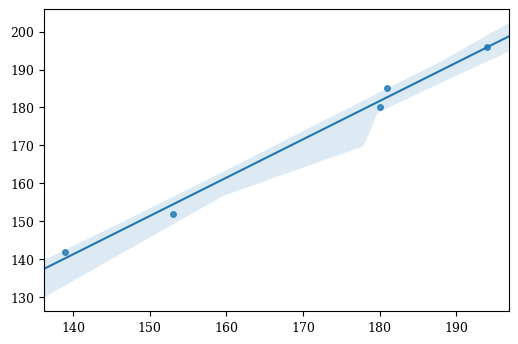

In [17]:
l1norm = data[:,0] + data[:,1]
sns.regplot(x=l1norm, y=label[:,0], fit_reg=True)
plt.show()

## Generate Model

In [18]:
X = tf.placeholder(tf.float32, shape=[None,2], name="data")
Y = tf.placeholder(tf.float32, shape=[None,1], name="label")
W = tf.Variable(tf.random_normal([2, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

In [19]:
hypothesis = tf.matmul(X, W) + b
loss = tf.reduce_mean(tf.square(hypothesis - Y + b))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(loss)

## Training

In [20]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [21]:
for step in range(301):
    loss_val, hy_val, _ = sess.run([loss, hypothesis, optimizer], feed_dict= {X:data, Y:label})
    if step % 50 == 0:
        rsp.showMulti(loss_val, hy_val)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [22]:
srcDatas

array([[ 73,  80, 152],
       [ 93,  88, 185],
       [ 89,  91, 180],
       [ 96,  98, 196],
       [ 73,  66, 142]])

## Predict

In [23]:
sess.run(hypothesis, feed_dict={X:[[70, 90]]})

array([[151.58]], dtype=float32)